__Note__: The data being viewed is obscene and explicit, simply by virtue of the dataset. It in no way, shape, or form represents the viewpoints of the authors.

In [1]:
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from functions import build_data_path, load_bad_words
from constants import LABEL_COLS

STOP_WORDS = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quontas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
training_data_path = build_data_path('train.csv')

In [3]:
def toxic(row):
    return 1 if any(row) else 0

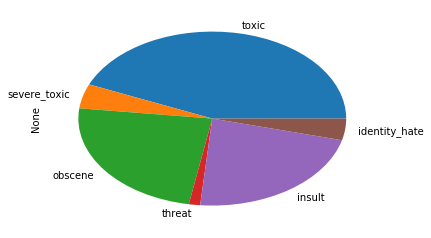

In [4]:
df = pd.read_csv(training_data_path)
X = df['comment_text']
y = df[LABEL_COLS]

y.sum().plot(kind='pie')

In [5]:
words = []
BAD_WORDS = load_bad_words()
for index, row in df.iterrows():
    if toxic(row[LABEL_COLS]):
        words += [w for w in row['comment_text'].lower().split(' ') if w not in STOP_WORDS]
counter = Counter(words)

bad_word_counts = {w: counter[w] for w in BAD_WORDS}

bad_word_counter = Counter(**bad_word_counts)

count_dict = {key: (val / sum(bad_word_counter.values())) for (key, val) in bad_word_counter.most_common(30)}

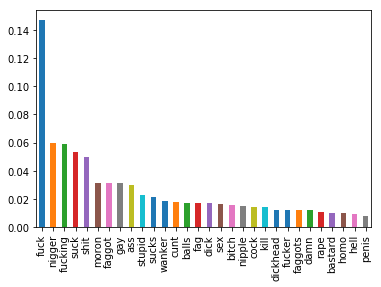

In [6]:
bad_word_series = pd.Series(count_dict)
bad_word_series.plot(kind='bar')

It's clear that the list of obscene words we use (obtained from [here](https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/)) is present in the toxic comments, so it likely will be a useful feature.

In [7]:
print(f"Number of training rows: {len(df)}")

Number of training rows: 159571


There is a clear imbalance between the number of non-toxic and toxic comments. And within those toxic comments, there's imbalances in the frequencies with which categories appear more often. These imbalances will need to be accounted for in our models.

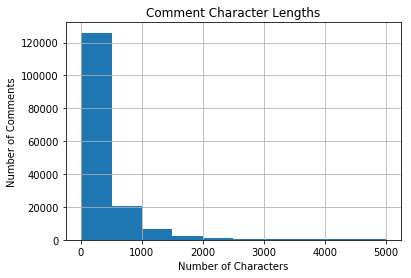

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: char_length, dtype: float64

In [8]:
df['char_length'] = df['comment_text'].apply(lambda x: len(str(x)))
df['char_length'].hist()
plt.title('Comment Character Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Comments')
plt.show()
df['char_length'].describe()

It seems as though most comments are between 0 and 1000 characters in length. If we use embeddings, it might be in our best interest to do character-level embeddings instead of word embeddings.